In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [146]:
df_proba = pd.read_csv('../data/df_probabilities_100.csv')
df_d_target =pd.read_csv('../data/df_d_target_100.csv')
df_g_res = pd.read_csv('../data/df_g_res_100.csv')

df_g_res.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_d_target.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [147]:
net_generation = []
for _, row in df_g_res.iterrows():
    net_generation.append(row.values.reshape(100,) @ df_proba['0'].values.reshape((100,)))

net_generation = pd.Series(net_generation)

## Optimistic 

In [148]:
df_optimistic = pd.read_csv('../data/optimistic_params_2000_with_obj.csv')
df_optimistic.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_optimistic

0         1         2         3         4  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.717547  0.654177  0.013093  0.877737  0.104077   
           B_tilde        0.321196  0.454466  0.749068  0.460760  0.372843   
           a              0.989779  0.217117  0.606744  0.074443  0.541778   
           b              0.636386  0.172969  0.723784  0.608133  0.861277   
           d              0.484944  0.755008  0.937329  0.727731  0.151528   
...                            ...       ...       ...       ...       ...   
1999       a              0.369826  0.189197  0.529484  0.746706  0.067378   
           b              0.165610  0.284443  0.799789  0.344621  0.655007   
           d              0.160511  0.253647  0.078895  0.003548  0.356696   
           objective     -0.452322  0.020360 -0.351223 -0.946423 -0.237830   
           risk_aversion  0.614504  0.366860  0.442343  0.369069  0.814488   

                                 5         6         7         8         9  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.967468  0.406434  0.921869  0.028222  0.039824   
           B_tilde        0.908785  0.912784  0.468212  0.332271  0.937093   
           a              0.210180  0.136613  0.981449  0.533806  0.062125   
           b              0.718491  0.523857  0.305293  0.481276  0.387807   
           d              0.766490  0.175645  0.453242  0.881070  0.982530   
...                            ...       ...       ...       ...       ...   
1999       a              0.192418  0.881850  0.214001  0.480392  0.216424   
           b              0.095538  0.777456  0.664885  0.335663  0.525495   
           d              0.818701  0.748795  0.930096  0.198560  0.502350   
           objective     -0.190480  0.206019  0.474208 -0.020297  0.105095   
           risk_aversion  0.842747  0.306297  0.392778  0.889301  0.893431   

                          ...        15        16        17        18  \
Unnamed: 0 Unnamed: 1     ...                                           
0          A_tilde        ...  0.328909  0.951172  0.267743  0.295853   
           B_tilde        ...  0.147292  0.660800  0.544742  0.880750   
           a              ...  0.909541  0.129962  0.028962  0.489391   
           b              ...  0.920114  0.520913  0.698510  0.752916   
           d              ...  0.053421  0.276132  0.421057  0.892414   
...                       ...       ...       ...       ...       ...   
1999       a              ...  0.677218  0.049889  0.495318  0.167262   
           b              ...  0.020919  0.373464  0.195096  0.755937   
           d              ...  0.126103  0.077541  0.000206  0.730584   
           objective      ... -0.947243 -0.341551 -0.574911  0.916501   
           risk_aversion  ...  0.294203  0.536948  0.391047  0.552773   

                                19        20        21        22        23  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.623533  0.973707  0.476848  0.666707  0.155502   
           B_tilde        0.124592  0.279776  0.847677  0.795926  0.096711   
           a              0.102483  0.629521  0.306684  0.514739  0.473038   
           b              0.159282  0.253708  0.064357  0.806582  0.741722   
           d              0.035648  0.915235  0.734328  0.505918  0.427903   
...                            ...       ...       ...       ...       ...   
1999       a              0.208154  0.537937  0.372154  0.950846  0.511756   
           b              0.543812  0.701483  0.355683  0.754106  0.844660   
           d              0.121553  0.173995  0.084644  0.547398  0.256455   
           objective     -0.655783 -0.581261  0.383506 -1.114697 -0.100581   
           risk_aversion  0.035062  0.060813  0.778704  0.201295  0.385945   

                                24  
U

## Pessimsitic

In [149]:
df_pessimistic = pd.read_csv('../data/pessimistic_params_2000_with_obj.csv')
df_pessimistic.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_pessimistic

0         1         2         3         4  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.717547  0.654177  0.013093  0.877737  0.104077   
           B_tilde        0.321196  0.454466  0.749068  0.460760  0.372843   
           a              0.989779  0.217117  0.606744  0.074443  0.541778   
           b              0.636386  0.172969  0.723784  0.608133  0.861277   
           d              0.484944  0.755008  0.937329  0.727731  0.151528   
...                            ...       ...       ...       ...       ...   
1999       a              0.369826  0.189197  0.529484  0.746706  0.067378   
           b              0.165610  0.284443  0.799789  0.344621  0.655007   
           d              0.160511  0.253647  0.078895  0.003548  0.356696   
           objective     -0.920778 -0.474114 -0.891247 -1.452265 -0.704405   
           risk_aversion  0.614504  0.366860  0.442343  0.369069  0.814488   

                                 5         6         7         8         9  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.967468  0.406434  0.921869  0.028222  0.039824   
           B_tilde        0.908785  0.912784  0.468212  0.332271  0.937093   
           a              0.210180  0.136613  0.981449  0.533806  0.062125   
           b              0.718491  0.523857  0.305293  0.481276  0.387807   
           d              0.766490  0.175645  0.453242  0.881070  0.982530   
...                            ...       ...       ...       ...       ...   
1999       a              0.192418  0.881850  0.214001  0.480392  0.216424   
           b              0.095538  0.777456  0.664885  0.335663  0.525495   
           d              0.818701  0.748795  0.930096  0.198560  0.502350   
           objective     -0.659123 -0.260094  0.000084 -0.486037 -0.441758   
           risk_aversion  0.842747  0.306297  0.392778  0.889301  0.893431   

                          ...        15        16        17        18  \
Unnamed: 0 Unnamed: 1     ...                                           
0          A_tilde        ...  0.328909  0.951172  0.267743  0.295853   
           B_tilde        ...  0.147292  0.660800  0.544742  0.880750   
           a              ...  0.909541  0.129962  0.028962  0.489391   
           b              ...  0.920114  0.520913  0.698510  0.752916   
           d              ...  0.053421  0.276132  0.421057  0.892414   
...                       ...       ...       ...       ...       ...   
1999       a              ...  0.677218  0.049889  0.495318  0.167262   
           b              ...  0.020919  0.373464  0.195096  0.755937   
           d              ...  0.126103  0.077541  0.000206  0.730584   
           objective      ... -1.409315 -0.800071 -1.088827  0.372333   
           risk_aversion  ...  0.294203  0.536948  0.391047  0.552773   

                                19        20        21        22        23  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.623533  0.973707  0.476848  0.666707  0.155502   
           B_tilde        0.124592  0.279776  0.847677  0.795926  0.096711   
           a              0.102483  0.629521  0.306684  0.514739  0.473038   
           b              0.159282  0.253708  0.064357  0.806582  0.741722   
           d              0.035648  0.915235  0.734328  0.505918  0.427903   
...                            ...       ...       ...       ...       ...   
1999       a              0.208154  0.537937  0.372154  0.950846  0.511756   
           b              0.543812  0.701483  0.355683  0.754106  0.844660   
           d              0.121553  0.173995  0.084644  0.547398  0.256455   
           objective     -1.132061 -1.053487 -0.116287 -1.621675 -0.563888   
           risk_aversion  0.035062  0.060813  0.778704  0.201295  0.385945   

                                24  
U

## Without contracts

In [150]:
df_without_contracts = pd.read_csv('../data/without_contracts_params_2000_with_obj.csv')
df_without_contracts.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_without_contracts

0          1            2           3  \
Unnamed: 0 Unnamed: 1                                                     
0          A_tilde         0.717547   0.654177     0.013093    0.877737   
           B_tilde         0.321196   0.454466     0.749068    0.460760   
           a               0.989779   0.217117     0.606744    0.074443   
           b               0.636386   0.172969     0.723784    0.608133   
           d               0.484944   0.755008     0.937329    0.727731   
...                             ...        ...          ...         ...   
1999       a               0.369826   0.189197     0.529484    0.746706   
           b               0.165610   0.284443     0.799789    0.344621   
           d               0.160511   0.253647     0.078895    0.003548   
           objective      24.391366  38.938954  6531.080296  101.424673   
           risk_aversion   0.614504   0.366860     0.442343    0.369069   

                                  4          5           6          7  \
Unnamed: 0 Unnamed: 1                                                   
0          A_tilde         0.104077   0.967468    0.406434   0.921869   
           B_tilde         0.372843   0.908785    0.912784   0.468212   
           a               0.541778   0.210180    0.136613   0.981449   
           b               0.861277   0.718491    0.523857   0.305293   
           d               0.151528   0.766490    0.175645   0.453242   
...                             ...        ...         ...        ...   
1999       a               0.067378   0.192418    0.881850   0.214001   
           b               0.655007   0.095538    0.777456   0.664885   
           d               0.356696   0.818701    0.748795   0.930096   
           objective      52.701640  34.594195  109.867986  66.520330   
           risk_aversion   0.814488   0.842747    0.306297   0.392778   

                                  8          9  ...         15         16  \
Unnamed: 0 Unnamed: 1                           ...                         
0          A_tilde         0.028222   0.039824  ...   0.328909   0.951172   
           B_tilde         0.332271   0.937093  ...   0.147292   0.660800   
           a               0.533806   0.062125  ...   0.909541   0.129962   
           b               0.481276   0.387807  ...   0.920114   0.520913   
           d               0.881070   0.982530  ...   0.053421   0.276132   
...                             ...        ...  ...        ...        ...   
1999       a               0.480392   0.216424  ...   0.677218   0.049889   
           b               0.335663   0.525495  ...   0.020919   0.373464   
           d               0.198560   0.502350  ...   0.126103   0.077541   
           objective      15.947157  68.092826  ...  14.567238  85.915651   
           risk_aversion   0.889301   0.893431  ...   0.294203   0.536948   

                                  17         18           19         20  \
Unnamed: 0 Unnamed: 1                                                     
0          A_tilde          0.267743   0.295853     0.623533   0.973707   
           B_tilde          0.544742   0.880750     0.124592   0.279776   
           a                0.028962   0.489391     0.102483   0.629521   
           b                0.698510   0.752916     0.159282   0.253708   
           d                0.421057   0.892414     0.035648   0.915235   
...                              ...        ...          ...        ...   
1999       a                0.495318   0.167262     0.208154   0.537937   
           b                0.195096   0.755937     0.543812   0.701483   
           d                0.000206   0.730584     0.121553   0.173995   
           objective      379.433346  29.000426  1280.703926  40.359462   
           risk_aversion    0.391047   0.552773     0.035062   0.060813   

                                  21         22         23          24  
Unnamed: 0 Unnamed: 1                                    

## Risk-Neutral

In [151]:
df_RN = pd.read_csv('../data/RN_param_2000_with_obj.csv')
df_RN.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_RN

0         1         2         3         4  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.717547  0.654177  0.013093  0.877737  0.104077   
           B_tilde        0.321196  0.454466  0.749068  0.460760  0.372843   
           a              0.989779  0.217117  0.606744  0.074443  0.541778   
           b              0.636386  0.172969  0.723784  0.608133  0.861277   
           d              0.484944  0.755008  0.937329  0.727731  0.151528   
...                            ...       ...       ...       ...       ...   
1999       a              0.369826  0.189197  0.529484  0.746706  0.067378   
           b              0.165610  0.284443  0.799789  0.344621  0.655007   
           d              0.160511  0.253647  0.078895  0.003548  0.356696   
           objective     -0.466476  0.014901 -0.371336 -1.082939 -0.241659   
           risk_aversion  0.614504  0.366860  0.442343  0.369069  0.814488   

                                 5         6         7         8         9  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.967468  0.406434  0.921869  0.028222  0.039824   
           B_tilde        0.908785  0.912784  0.468212  0.332271  0.937093   
           a              0.210180  0.136613  0.981449  0.533806  0.062125   
           b              0.718491  0.523857  0.305293  0.481276  0.387807   
           d              0.766490  0.175645  0.453242  0.881070  0.982530   
...                            ...       ...       ...       ...       ...   
1999       a              0.192418  0.881850  0.214001  0.480392  0.216424   
           b              0.095538  0.777456  0.664885  0.335663  0.525495   
           d              0.818701  0.748795  0.930096  0.198560  0.502350   
           objective     -0.224780  0.197325  0.437483 -0.013836  0.086678   
           risk_aversion  0.842747  0.306297  0.392778  0.889301  0.893431   

                          ...        15        16        17        18  \
Unnamed: 0 Unnamed: 1     ...                                           
0          A_tilde        ...  0.328909  0.951172  0.267743  0.295853   
           B_tilde        ...  0.147292  0.660800  0.544742  0.880750   
           a              ...  0.909541  0.129962  0.028962  0.489391   
           b              ...  0.920114  0.520913  0.698510  0.752916   
           d              ...  0.053421  0.276132  0.421057  0.892414   
...                       ...       ...       ...       ...       ...   
1999       a              ...  0.677218  0.049889  0.495318  0.167262   
           b              ...  0.020919  0.373464  0.195096  0.755937   
           d              ...  0.126103  0.077541  0.000206  0.730584   
           objective      ... -0.952774 -0.327719 -0.585628  0.896152   
           risk_aversion  ...  0.294203  0.536948  0.391047  0.552773   

                                19        20        21        22        23  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.623533  0.973707  0.476848  0.666707  0.155502   
           B_tilde        0.124592  0.279776  0.847677  0.795926  0.096711   
           a              0.102483  0.629521  0.306684  0.514739  0.473038   
           b              0.159282  0.253708  0.064357  0.806582  0.741722   
           d              0.035648  0.915235  0.734328  0.505918  0.427903   
...                            ...       ...       ...       ...       ...   
1999       a              0.208154  0.537937  0.372154  0.950846  0.511756   
           b              0.543812  0.701483  0.355683  0.754106  0.844660   
           d              0.121553  0.173995  0.084644  0.547398  0.256455   
           objective     -0.704672 -0.588732  0.375524 -1.263678 -0.106420   
           risk_aversion  0.035062  0.060813  0.778704  0.201295  0.385945   

                                24  
U

## Without IC

In [152]:
df_without_IC = pd.read_csv('../data/without_IC_params_2000_with_obj.csv')
df_without_IC.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_without_IC

0          1            2           3  \
Unnamed: 0 Unnamed: 1                                                     
0          A_tilde         0.717547   0.654177     0.013093    0.877737   
           B_tilde         0.321196   0.454466     0.749068    0.460760   
           a               0.989779   0.217117     0.606744    0.074443   
           b               0.636386   0.172969     0.723784    0.608133   
           d               0.484944   0.755008     0.937329    0.727731   
...                             ...        ...          ...         ...   
1999       a               0.369826   0.189197     0.529484    0.746706   
           b               0.165610   0.284443     0.799789    0.344621   
           d               0.160511   0.253647     0.078895    0.003548   
           objective      27.552603  42.797383  6612.253491  125.482380   
           risk_aversion   0.614504   0.366860     0.442343    0.369069   

                                  4          5           6          7  \
Unnamed: 0 Unnamed: 1                                                   
0          A_tilde         0.104077   0.967468    0.406434   0.921869   
           B_tilde         0.372843   0.908785    0.912784   0.468212   
           a               0.541778   0.210180    0.136613   0.981449   
           b               0.861277   0.718491    0.523857   0.305293   
           d               0.151528   0.766490    0.175645   0.453242   
...                             ...        ...         ...        ...   
1999       a               0.067378   0.192418    0.881850   0.214001   
           b               0.655007   0.095538    0.777456   0.664885   
           d               0.356696   0.818701    0.748795   0.930096   
           objective      57.576526  39.885701  114.835483  83.177740   
           risk_aversion   0.814488   0.842747    0.306297   0.392778   

                                  8          9  ...         15         16  \
Unnamed: 0 Unnamed: 1                           ...                         
0          A_tilde         0.028222   0.039824  ...   0.328909   0.951172   
           B_tilde         0.332271   0.937093  ...   0.147292   0.660800   
           a               0.533806   0.062125  ...   0.909541   0.129962   
           b               0.481276   0.387807  ...   0.920114   0.520913   
           d               0.881070   0.982530  ...   0.053421   0.276132   
...                             ...        ...  ...        ...        ...   
1999       a               0.480392   0.216424  ...   0.677218   0.049889   
           b               0.335663   0.525495  ...   0.020919   0.373464   
           d               0.198560   0.502350  ...   0.126103   0.077541   
           objective      18.413806  71.799192  ...  16.492979  90.093378   
           risk_aversion   0.889301   0.893431  ...   0.294203   0.536948   

                                  17         18           19         20  \
Unnamed: 0 Unnamed: 1                                                     
0          A_tilde          0.267743   0.295853     0.623533   0.973707   
           B_tilde          0.544742   0.880750     0.124592   0.279776   
           a                0.028962   0.489391     0.102483   0.629521   
           b                0.698510   0.752916     0.159282   0.253708   
           d                0.421057   0.892414     0.035648   0.915235   
...                              ...        ...          ...        ...   
1999       a                0.495318   0.167262     0.208154   0.537937   
           b                0.195096   0.755937     0.543812   0.701483   
           d                0.000206   0.730584     0.121553   0.173995   
           objective      383.607730  32.684433  1614.282598  44.071573   
           risk_aversion    0.391047   0.552773     0.035062   0.060813   

                                  21          22         23          24  
Unnamed: 0 Unnamed: 1                                   

### Data for boxplots OBP - PBP

#### Data wrt. net generation

In [153]:
chunks_gen = [[] for i in range(4)]
for i in range(2000):
    obj_0_opt = df_optimistic.loc[i].loc['objective']
    obj_0_pes = df_pessimistic.loc[i].loc['objective']

    diff = (obj_0_opt - obj_0_pes)

    index_0 = net_generation[net_generation < 0.6].index
    index_1 = net_generation[(0.6 <= net_generation) & (net_generation < 0.7)].index
    index_2 = net_generation[(0.7 <= net_generation) & (net_generation < 0.8)].index
    index_3 = net_generation[net_generation >= 0.8].index

    chunks_gen[0]+= diff[index_0].dropna().values.tolist()
    chunks_gen[1]+= diff[index_1].dropna().values.tolist()
    chunks_gen[2]+= diff[index_2].dropna().values.tolist()
    chunks_gen[3]+= diff[index_3].dropna().values.tolist()


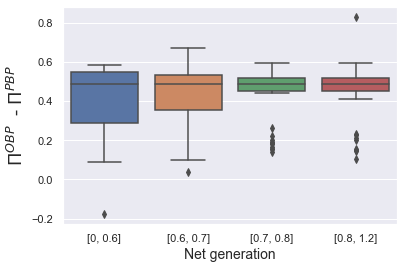

In [154]:
fig = plt.figure

data_gen = []
for i in range(4):
    data_gen.append(chunks_gen[i][1:50])

plt.xlabel('Net generation', fontsize = 14)
plt.ylabel('$\Pi^{OBP}$  - $\Pi^{PBP}$', fontsize = 18)

sns.set_style('white')
sns.boxplot(data = data_gen, showfliers=True)
plt.xticks([0,1,2,3], ['[0, 0.6]', '[0.6, 0.7]', '[0.7, 0.8]', '[0.8, 1.2]'])

fig;

### Data wrt. risk aversion

In [155]:
chunks_risk = [[] for i in range(5)]
for i in range(2000):
    obj_0_opt = df_optimistic.loc[i].loc['objective']
    obj_0_pes = df_pessimistic.loc[i].loc['objective']

    diff = (obj_0_opt - obj_0_pes)

    risk_line = df_optimistic.loc[i].loc['risk_aversion']

    index_0 = risk_line[risk_line < 0.2].index
    index_1 = risk_line[(0.2 <= risk_line) & (risk_line < 0.4)].index
    index_2 = risk_line[(0.4 <= risk_line) & (risk_line < 0.6)].index
    index_3 = risk_line[(0.6 <= risk_line) & (risk_line < 0.8)].index
    index_4 = risk_line[0.8 <= risk_line].index

    chunks_risk[0] += diff[index_0].dropna().values.tolist()
    chunks_risk[1] += diff[index_1].dropna().values.tolist()
    chunks_risk[2] += diff[index_2].dropna().values.tolist()
    chunks_risk[3] += diff[index_3].dropna().values.tolist()
    chunks_risk[4] += diff[index_4].dropna().values.tolist()

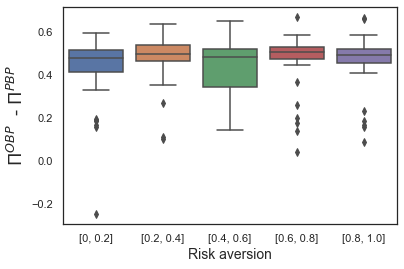

In [156]:
fig = plt.figure

data_risk = []
for i in range(5):
    data_risk.append(chunks_risk[i][1:40])

plt.xlabel('Risk aversion', fontsize = 14)
plt.ylabel('$\Pi^{OBP}$  - $\Pi^{PBP}$', fontsize = 18)

sns.set_style('white')
sns.boxplot(data = data_risk, showfliers=True)
plt.xticks([0,1,2,3,4], ['[0, 0.2]', '[0.2, 0.4]', '[0.4, 0.6]', '[0.6, 0.8]', '[0.8, 1.0]'])

fig;

## Data for RN -> RA -> Without IC -> OBP -> PBP

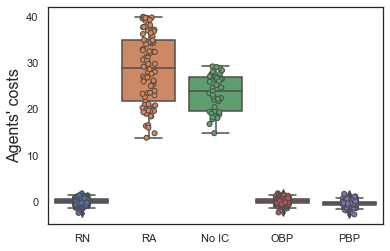

In [157]:
fig = plt.figure
cats_total = []
data_total = []
for i in range(10):
    obj_opt = df_optimistic.loc[i].loc['objective'].values.tolist()
    obj_pes = df_pessimistic.loc[i].loc['objective'].values.tolist()
    obj_RN = df_RN.loc[i].loc['objective'].values.tolist()
    obj_without_contracts = df_without_contracts.loc[i].loc['objective'][df_without_contracts.loc[i].loc['objective']<40].values.tolist()
    obj_without_IC = df_without_IC.loc[i].loc['objective'][df_without_IC.loc[i].loc['objective']<30].values.tolist()


    data = obj_RN + obj_without_contracts + obj_without_IC + obj_opt + obj_pes

    cats = ([0 for i in range(len(obj_RN))] + [1 for j in range(len(obj_without_contracts))] 
            + [2 for l in range(len(obj_without_IC))]
            + [3 for k in range(len(obj_opt))] + [4 for m in range(len(obj_pes))])

    cats_total += cats
    data_total += data



    sns.stripplot(x = cats, y = data, linewidth=1)

    
    #sum_opt = obj_opt.sum()
    #sum_pes = obj_pes.sum()

    #sns.swarmplot(x = [0,1,2,3], y=  data)

    #plt.scatter(net_generation, obj_0_pes, color = 'b')
    #plt.scatter(i, sum_opt - sum_pes)
    #plt.plot(net_generation, obj_0_opt - obj_0_pes)
#plt.scatter(net_generation[obj_0_wc<20], obj_0_wc[obj_0_wc<20], color = 'g')
sns.boxplot(x = cats_total, y = data_total)
plt.ylabel('Agents\' costs', fontsize = 16)
plt.xticks([0,1,2,3,4], ['RN', 'RA', 'No IC', 'OBP', 'PBP'])
fig;

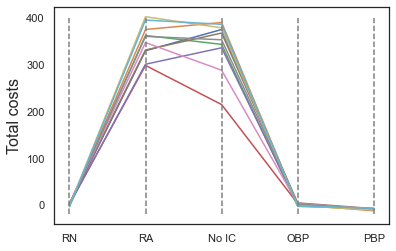

In [158]:
fig = plt.figure
for i in range(10):
    obj_opt = df_optimistic.loc[i].loc['objective'].values.tolist()
    obj_pes = df_pessimistic.loc[i].loc['objective'].values.tolist()
    obj_RN = df_RN.loc[i].loc['objective'].values.tolist()
    obj_without_contracts = df_without_contracts.loc[i].loc['objective'][df_without_contracts.loc[i].loc['objective']<50].values.tolist()
    obj_without_IC = df_without_IC.loc[i].loc['objective'][df_without_IC.loc[i].loc['objective']<50].values.tolist()


    #data = obj_RN + obj_without_contracts + obj_opt + obj_pes

    #cats = ([0 for i in range(len(obj_RN))] + [1 for j in range(len(obj_without_contracts))]+ 
    #        [2 for k in range(len(obj_opt))] + [3 for m in range(len(obj_pes))])


    #sns.stripplot(x = cats, y = data, linewidth=1)

    
    sum_opt = sum(obj_opt)
    sum_pes = sum(obj_pes)
    sum_RN = sum(obj_RN)
    sum_no_IC = sum(obj_without_IC)
    sum_without_contracts = sum(obj_without_contracts)

    #sns.set_style('whitegrid')
    #sns.set_style("ticks")
    plt.plot([0,1,2,3,4],[sum_RN, sum_without_contracts, sum_no_IC, sum_opt, sum_pes])

    #plt.scatter(net_generation, obj_0_pes, color = 'b')
    #plt.scatter(i, sum_opt - sum_pes)
    #plt.plot(net_generation, obj_0_opt - obj_0_pes)
#plt.scatter(net_generation[obj_0_wc<20], obj_0_wc[obj_0_wc<20], color = 'g')
plt.ylabel('Total costs', fontsize = 16)
plt.xticks([0,1,2,3,4], ['RN', 'RA', 'No IC', 'OBP', 'PBP'])
plt.vlines([0,1,2,3,4], -20, 400, linestyles='dashed', colors='gray')
fig;

## Insurance company profits 

In [169]:
df_IC_profit_opt = pd.read_csv('../data/IC_objective_optimistic_2000.csv')
df_IC_profit_opt.drop(['Unnamed: 0'], axis =1, inplace=True)

In [170]:
df_IC_profit_pes = pd.read_csv('../data/IC_objective_pessimistic_2000.csv')
df_IC_profit_pes.drop(['Unnamed: 0'], axis =1, inplace=True)

In [183]:
def table(index):
    obj_opt = df_optimistic.loc[index].loc['objective'].values.tolist()
    obj_pes = df_pessimistic.loc[index].loc['objective'].values.tolist()
    obj_RN = df_RN.loc[index].loc['objective'].values.tolist()
    obj_without_contracts = df_without_contracts.loc[index].loc['objective'][df_without_contracts.loc[index].loc['objective']<50].values.tolist()
    obj_without_IC = df_without_IC.loc[index].loc['objective'][df_without_IC.loc[index].loc['objective']<50].values.tolist()


    #data = obj_RN + obj_without_contracts + obj_opt + obj_pes

    #cats = ([0 for i in range(len(obj_RN))] + [1 for j in range(len(obj_without_contracts))]+ 
    #        [2 for k in range(len(obj_opt))] + [3 for m in range(len(obj_pes))])


    #sns.stripplot(x = cats, y = data, linewidth=1)

    
    sum_opt = sum(obj_opt)
    sum_pes = sum(obj_pes)
    sum_RN = sum(obj_RN)
    sum_no_IC = sum(obj_without_IC)
    sum_without_contracts = sum(obj_without_contracts)

    IC_opt =  df_IC_profit_opt.loc[index]
    IC_pes =  df_IC_profit_pes.loc[index]

    return {'Agents RN' : sum_RN,
            'Agents RA' : sum_without_contracts,
            'Agents no IC' : sum_no_IC,
            'Agents opt' : sum_opt,
            'Agents pes' : sum_pes,
            'IC opt' : IC_opt.values,
            'IC pes' : IC_pes.values}

In [212]:
res = table(3)
res

{'Agents RN': 2.6022380409299948,
 'Agents RA': 298.37615177157545,
 'Agents no IC': 214.73769489037255,
 'Agents opt': 3.2615572111799294,
 'Agents pes': -9.011496586979328,
 'IC opt': array([-0.61034813]),
 'IC pes': array([11.62552092])}

## Regression

In [227]:
df_params = pd.read_csv('../data/param_2000.csv')
df_params.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace=True)
df_params

0         1         2         3         4  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.717547  0.654177  0.013093  0.877737  0.104077   
           B_tilde        0.321196  0.454466  0.749068  0.460760  0.372843   
           a              0.989779  0.217117  0.606744  0.074443  0.541778   
           b              0.636386  0.172969  0.723784  0.608133  0.861277   
           d              0.484944  0.755008  0.937329  0.727731  0.151528   
...                            ...       ...       ...       ...       ...   
1999       B_tilde        0.500874  0.324205  0.793247  0.369542  0.548601   
           a              0.369826  0.189197  0.529484  0.746706  0.067378   
           b              0.165610  0.284443  0.799789  0.344621  0.655007   
           d              0.160511  0.253647  0.078895  0.003548  0.356696   
           risk_aversion  0.614504  0.366860  0.442343  0.369069  0.814488   

                                 5         6         7         8         9  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.967468  0.406434  0.921869  0.028222  0.039824   
           B_tilde        0.908785  0.912784  0.468212  0.332271  0.937093   
           a              0.210180  0.136613  0.981449  0.533806  0.062125   
           b              0.718491  0.523857  0.305293  0.481276  0.387807   
           d              0.766490  0.175645  0.453242  0.881070  0.982530   
...                            ...       ...       ...       ...       ...   
1999       B_tilde        0.494079  0.507378  0.196287  0.274166  0.830468   
           a              0.192418  0.881850  0.214001  0.480392  0.216424   
           b              0.095538  0.777456  0.664885  0.335663  0.525495   
           d              0.818701  0.748795  0.930096  0.198560  0.502350   
           risk_aversion  0.842747  0.306297  0.392778  0.889301  0.893431   

                          ...        15        16        17        18  \
Unnamed: 0 Unnamed: 1     ...                                           
0          A_tilde        ...  0.328909  0.951172  0.267743  0.295853   
           B_tilde        ...  0.147292  0.660800  0.544742  0.880750   
           a              ...  0.909541  0.129962  0.028962  0.489391   
           b              ...  0.920114  0.520913  0.698510  0.752916   
           d              ...  0.053421  0.276132  0.421057  0.892414   
...                       ...       ...       ...       ...       ...   
1999       B_tilde        ...  0.867202  0.587262  0.821744  0.288427   
           a              ...  0.677218  0.049889  0.495318  0.167262   
           b              ...  0.020919  0.373464  0.195096  0.755937   
           d              ...  0.126103  0.077541  0.000206  0.730584   
           risk_aversion  ...  0.294203  0.536948  0.391047  0.552773   

                                19        20        21        22        23  \
Unnamed: 0 Unnamed: 1                                                        
0          A_tilde        0.623533  0.973707  0.476848  0.666707  0.155502   
           B_tilde        0.124592  0.279776  0.847677  0.795926  0.096711   
           a              0.102483  0.629521  0.306684  0.514739  0.473038   
           b              0.159282  0.253708  0.064357  0.806582  0.741722   
           d              0.035648  0.915235  0.734328  0.505918  0.427903   
...                            ...       ...       ...       ...       ...   
1999       B_tilde        0.457723  0.736485  0.041824  0.863264  0.355207   
           a              0.208154  0.537937  0.372154  0.950846  0.511756   
           b              0.543812  0.701483  0.355683  0.754106  0.844660   
           d              0.121553  0.173995  0.084644  0.547398  0.256455   
           risk_aversion  0.035062  0.060813  0.778704  0.201295  0.385945   

                                24  
U

In [228]:
opt_TC= []
pes_TC = []
for i in range(2000):
    res = table(i)

    opt_TC.append(res['Agents opt'])
    pes_TC.append(res['Agents pes'])

opt_TC = pd.Series(opt_TC)
pes_TC = pd.Series(pes_TC)

In [235]:
total_list = []
for i in range(2000):
    list_a_tilde = df_params.loc[i].loc['A_tilde'].values.tolist()
    list_b_tilde = df_params.loc[i].loc['B_tilde'].values.tolist()
    list_a = df_params.loc[i].loc['a'].values.tolist()
    list_b = df_params.loc[i].loc['b'].values.tolist()
    list_d = df_params.loc[i].loc['d'].values.tolist()
    list_RA = df_params.loc[i].loc['risk_aversion'].values.tolist()

    list_res = list_a_tilde + list_b_tilde + list_a + list_b + list_d + list_RA

    total_list.append(list_res)

In [238]:
total_list = pd.Series(total_list)

0       [0.7175472057409094, 0.6541765016136218, 0.013...
1       [0.1358430712252495, 0.4218308140456426, 0.011...
2       [0.2707506287785983, 0.8110127685195985, 0.426...
3       [0.1597782520024754, 0.4961070992388713, 0.730...
4       [0.9081996341564984, 0.1748346539380831, 0.231...
                              ...                        
1995    [0.3660665990290158, 0.512475613556944, 0.5897...
1996    [0.6835959042653419, 0.0253747100662498, 0.809...
1997    [0.368290805309758, 0.8393082709518801, 0.6164...
1998    [0.904129313923606, 0.901388398144639, 0.68534...
1999    [0.5999998173418333, 0.9252114220315872, 0.378...
Length: 2000, dtype: object

In [231]:
from sklearn.linear_model import LinearRegression

In [241]:
reg = LinearRegression().fit(total_list[0:1800], opt_TC[0:1800])


In [243]:
reg.predict(total_list[1800:2000])

array([ 0.42917348,  8.01292759, -1.57101594,  1.02496553,  4.49261311,
        4.97770112,  2.82682326,  6.34561284,  0.56403555,  2.50420129,
        7.50588698,  5.44481066,  8.11368109,  1.02882532,  3.85556141,
        0.89472936,  4.67672936,  5.33095292,  4.17779446,  4.74289427,
        1.21521955,  1.86080688,  5.15830067, -1.54559077,  0.24456345,
        0.96337628,  1.25078336, -1.25349104,  4.96560726,  2.43653652,
       -1.48166452,  0.48748051,  4.75720896,  3.4660461 ,  3.35633834,
        4.77038856,  3.27745736,  6.4830297 ,  3.46165296,  5.58738765,
        2.67161713,  5.23484353,  5.18235569,  4.30712673,  2.38014065,
        2.71804775,  6.58089437,  8.44688629,  4.29439283,  3.95822201,
        1.86219547,  1.59862208, -0.46488932,  4.61221031,  5.60295939,
        2.96811096,  7.53893174,  7.40442842,  4.74410888,  0.97986085,
        1.92362949,  6.81202443,  2.4724611 ,  3.10257901, -3.17523403,
        8.20470835,  1.24682815,  2.39896804,  2.48438656,  2.53

In [255]:
weights = pd.Series(reg.coef_)

In [266]:
weights[weights > 1]

11     1.611364
88     1.070246
91     1.026752
106    1.819442
107    1.595882
109    1.732237
110    1.694975
112    1.647517
113    1.416406
114    1.717279
118    1.613604
120    1.521305
121    2.144418
124    1.496202
137    1.123480
138    1.113749
139    1.170433
dtype: float64

In [267]:
first_row = df_params.loc[0].loc['A_tilde'].append(df_params.loc[0].loc['B_tilde'], ignore_index=True).append(df_params.loc[0].loc['a'], ignore_index=True).append(df_params.loc[0].loc['b'], ignore_index=True).append(df_params.loc[0].loc['d'], ignore_index=True).append(df_params.loc[0].loc['risk_aversion'], ignore_index=True)
first_row

0      0.717547
1      0.654177
2      0.013093
3      0.877737
4      0.104077
         ...   
145    0.310902
146    0.710784
147    0.593612
148    0.117117
149    0.835381
Length: 150, dtype: float64

In [265]:
first_row[weights[weights > 1].index]

11     0.050973
88     0.152486
91     0.520913
106    0.175645
107    0.453242
109    0.982530
110    0.971886
112    0.150344
113    0.764811
114    0.852444
118    0.892414
120    0.915235
121    0.734328
124    0.213077
137    0.131348
138    0.528416
139    0.205595
dtype: float64